In [3]:
# 연습문제 7 p246, node (23)
import numpy as np
from scipy import stats

SBP = [35, 48, 65, 33, 61, 54, 49, 37, 58, 65]
conventional = [33, 40, 55, 41, 62, 54, 40, 35, 59, 56]

SBP_mean = np.mean(SBP)
conventional_mean = np.mean(conventional)

SBP_std = np.std(SBP, ddof=1)
conventional_std = np.std(conventional, ddof=1)

pooled_std = np.sqrt(((len(SBP) - 1) * SBP_std **2 + (len(conventional) -1) * conventional_std **2) / (len(SBP) + len(conventional) -2))

sem = pooled_std * np.sqrt(1 / len(SBP) +1 / len(conventional))

t_value = stats.t.ppf((1 +0.98) /2 , len(SBP) + len(conventional) -2)

margin_of_error = t_value * sem

ci_lower = (SBP_mean - conventional_mean) - margin_of_error
ci_upper = (SBP_mean - conventional_mean) + margin_of_error

print(f"450g당 비타민 양의 평균차이에 대한 98% 신뢰구간 : ({round((ci_lower), 1)} < mu < {round((ci_upper), 1)})")


450g당 비타민 양의 평균차이에 대한 98% 신뢰구간 : (-10.1 < mu < 16.1)


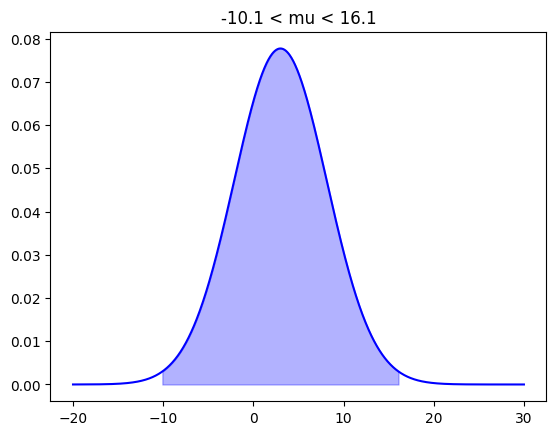

In [4]:
# 연습문제 7 p246, node (23) + 시각화
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-20, 30, 1000)

SBP = [35, 48, 65, 33, 61, 54, 49, 37, 58, 65]
conventional = [33, 40, 55, 41, 62, 54, 40, 35, 59, 56]

SBP_mean = np.mean(SBP)
SBP_std = np.std(SBP, ddof=1)
conventional_mean = np.mean(conventional)
conventional_std = np.std(conventional, ddof=1)

pooled_std = np.sqrt(((len(SBP) - 1) * SBP_std **2 + (len(conventional) -1) * conventional_std **2) / (len(SBP) + len(conventional) -2))

sem = pooled_std * np.sqrt(1 / len(SBP) +1 / len(conventional))

pdf = (1 / (sem * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - (SBP_mean - conventional_mean)) / sem) ** 2)

plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=(x > -10.1) & (x < 16.1), color='blue', alpha=0.3)

plt.axvline(-10.1, color="red", linestyle="--")
plt.axvline(16.1, color="red", linestyle="--")
plt.title('-10.1 < mu < 16.1')
plt.show()
